<h1><center>Laborator 1</center></h1>

### Importuri necesare

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

### Citire si afisare imagine color

In [3]:
img = cv.imread("butterfly.jpeg")
cv.imshow("Fluture galben", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Citire si afisare imagine gray

In [4]:
img = cv.imread("butterfly.jpeg", cv.IMREAD_GRAYSCALE)
cv.imshow("Fluture gray", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Dimensiune imagine

In [5]:
H, W = img.shape
print(H, W)

670 626


### Redimensionare imagine

In [6]:
img = cv.resize(img, (100, 100))
H, W = img.shape
print(H, W)
cv.imshow("Fluture gray redimensionat", img)
cv.waitKey(0)
cv.destroyAllWindows()

100 100


(57, 215, 300, 3)
(57, 215, 300)


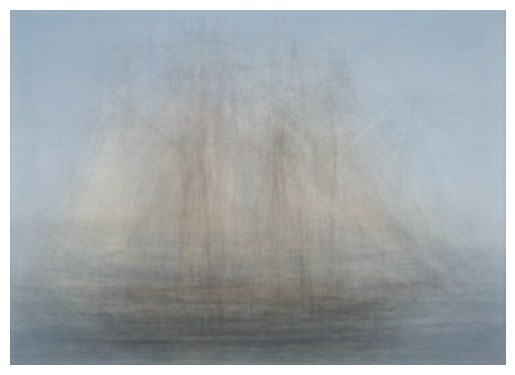

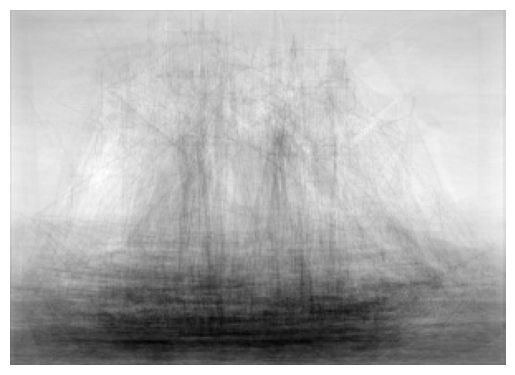

In [7]:
# 1.7
dir_path = 'colectiiImagini/set1'
files = os.listdir(dir_path)
color_images = []	
gray_images = []

for image_name in files:
    if image_name.endswith('jpg'):
        path = dir_path + '/' + image_name
        img = cv.imread(path)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        color_images.append(img)
        gray_images.append(img_gray)

color_images = np.array(color_images)
gray_images = np.array(gray_images)

print(color_images.shape)
print(gray_images.shape)

mean_color_image = np.uint8(np.mean(color_images, axis=0))
mean_color_image = cv.cvtColor(mean_color_image, cv.COLOR_BGR2RGB)

mean_gray_image = np.uint8(np.mean(gray_images, axis=0))

plt.imshow(mean_color_image)
plt.axis('off')
plt.show()

plt.imshow(mean_gray_image, cmap='gray')
plt.axis('off')
plt.show()

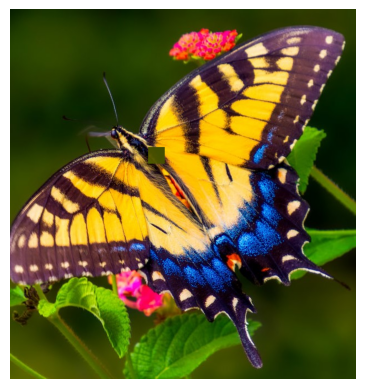

In [8]:
# 1.8
img = cv.imread("butterfly.jpeg")
ws = 30
img_crop = img[250:250+ws, 250:250+ws, :].copy()
H, W, _ = img.shape
nw = 10

y = np.random.randint(0, H-ws, size=nw)
x = np.random.randint(0, W-ws, size=nw)

dist = np.zeros(nw)
for i in range(nw):
    patch = img[y[i]:y[i]+ws, x[i]:x[i]+ws, :].copy()
    dist[i] = np.sqrt(np.sum((np.float64(patch) - np.float64(img_crop)) ** 2))

index = np.argmin(dist)

img_new = img.copy()
img_new[250:250+ws, 250:250+ws, :] = img[y[index]:y[index]+ws, x[index]:x[index]+ws, :].copy()

img_new = cv.cvtColor(img_new, cv.COLOR_BGR2RGB);
plt.imshow(img_new)
plt.axis('off')
plt.show()